In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def f_E(input, boundary):
    if min(input) < -boundary or max(input) > boundary:
        return -1
    return (input+boundary)/(2*boundary)
def f_S(input, boundary):
    if min(input) < -boundary or max(input) > boundary:
        return -1
    p_input = (input+np.abs(input))/2
    p_input = (p_input)/boundary*2
    n_input = (input-np.abs(input))/2
    n_input = (n_input)/boundary*2

    p_output = 1/(1+p_input**1.5)
    n_output = 1/(1+np.abs(n_input)**4)
    return p_output+n_output-1



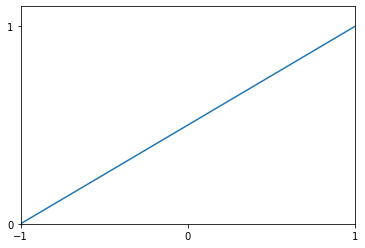

In [30]:
axis = np.linspace(-1,1,1000)
plt.plot(axis, f_E(axis, 1))
# plt.plot(axis, f_S(axis, 1))
plt.ylim(0,1.1)
plt.xlim(-1,1)
plt.gca().yaxis.set_ticks([0,1])
plt.gca().xaxis.set_ticks([-1,0,1])

[]

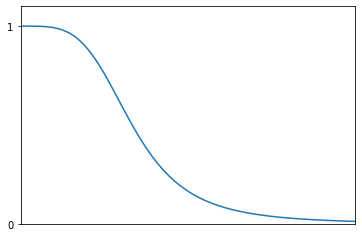

In [9]:
axis = np.linspace(0,3,1000)
plt.plot(axis, 1/(1+axis**4))
plt.ylim(0,1.1)
plt.xlim(0,3)
plt.gca().yaxis.set_ticks([0,1])
plt.gca().xaxis.set_ticks([])

[]

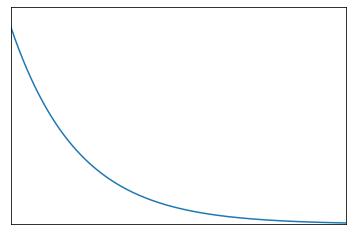

In [19]:
axis = np.linspace(0,5,1000)
plt.plot(axis, np.exp(-axis))
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])

[]

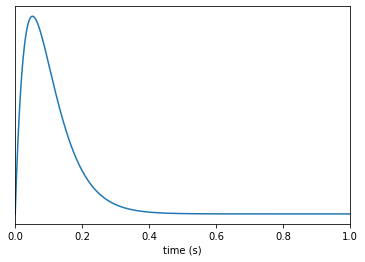

In [23]:
axis = np.linspace(0,1,1000)
tau_y = 0.051583
plt.plot(axis, np.exp(-axis/tau_y)*axis/tau_y**2)
# plt.ylim(0,1.1)
plt.xlim(0,1)
plt.xlabel('time (s)')
plt.gca().yaxis.set_ticks([])
# plt.gca().xaxis.set_ticks([])

[Text(0, 0, '$\\theta$')]

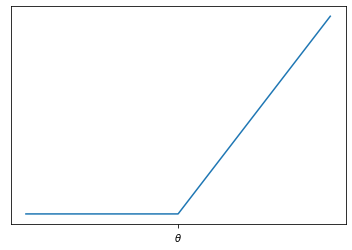

In [25]:
axis = np.linspace(-1,1,1000)
yaxis = axis.copy()
yaxis[axis<=0] = 0
plt.plot(axis, yaxis)
# plt.ylim(0,1.1)
# plt.xlim(0,1)
# plt.xlabel('time (s)')
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([0])
plt.gca().xaxis.set_ticklabels([r'$\theta$'])

In [26]:
def NGD_TK(T, m, n, alpha, beta, g, tau_y):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    y = np.zeros_like(x)
    z = np.zeros_like(x)
    
    for i in range(len(T)):
        y[i] = y[i-1] + dt*(-alpha*y[i-1]+m*x[i-1]-n*z[i-1])
        z[i] = z[i-1] + dt*( -beta*z[i-1]+g*y[i-1])
    return y[:len(T):50], z[:len(T):50]
m = 16.416565
n =	500
alpha = 41.464099
beta = 2.088120
g =  1729.111153/n
tau_y = 0.051583

dt = 0.01
TKaxis = np.arange(101)*dt

psi = 0.3
k_E, k_S = NGD_TK(TKaxis, m, n, alpha, beta, g, tau_y)

[]

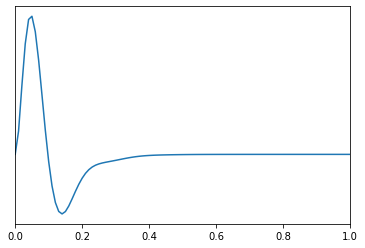

In [28]:
plt.plot(TKaxis, k_E)
# plt.ylim(0,1.1)
plt.xlim(0,1)
# plt.xlabel('time (s)')
plt.gca().yaxis.set_ticks([])
plt.xlabel('time (s)')
# plt.gca().xaxis.set_ticks([0])
# plt.gca().xaxis.set_ticklabels([r'$\theta$'])


Text(0.5, 0, 'time (s)')

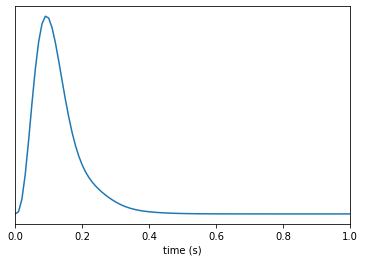

In [29]:
plt.plot(TKaxis, k_S)
plt.xlim(0,1)
plt.gca().yaxis.set_ticks([])
plt.xlabel('time (s)')